# Analisis y monitoreo de la Actividad Sismica en el Ecuador 

## Datos sismos

In [3]:
import pandas as pd

In [5]:
archivo_datos ="../data/cat_origen_2012-jul2025.txt"
# Leer el archivo, saltando las líneas de encabezado con '#'
catalogo = pd.read_csv(archivo_datos, comment='#')

# Limpiar nombres de columnas
catalogo.columns = catalogo.columns.str.strip()

# Convertir tipos de datos
catalogo['time_value'] = pd.to_datetime(catalogo['time_value'], errors='coerce')
catalogo['latitude_value'] = pd.to_numeric(catalogo['latitude_value'], errors='coerce')
catalogo['longitude_value'] = pd.to_numeric(catalogo['longitude_value'], errors='coerce')
catalogo['depth_value'] = pd.to_numeric(catalogo['depth_value'], errors='coerce')
catalogo['magnitude_value_P'] = pd.to_numeric(catalogo['magnitude_value_P'], errors='coerce')

# Eliminar filas vacías
catalogo = catalogo.dropna(subset=['time_value', 'latitude_value', 'longitude_value', 'magnitude_value_P'])

catalogo.head()


,event,orig_id,time_value,time_value_ms,time_uncertainty,latitude_value,latitude_uncertainty,longitude_value,longitude_uncertainty,depth_value,...,quality_associatedStationCount,quality_usedStationCount,quality_standardError,quality_azimuthalGap,quality_maximumDistance,quality_minimumDistance,quality_medianDistance,Fuente,methodID,earthModelID
0,igepn2012acvi,2610,2012-01-02 13:02:44,102854,1.322,-1.519048,9.36,-80.999382,10.05,10.00,...,15,13,0.80,311.15,377.37,210.01,287.76,IGEPN,LOCSAT,iasp91
1,igepn2012acxo,2611,2012-01-02 14:10:00,507680,0.740,-1.291955,6.01,-80.529152,4.74,12.00,...,31,23,0.85,233.55,319.54,44.93,237.95,IGEPN,LOCSAT,iasp91
2,igepn2012ahkn,2643,2012-01-05 01:18:17,293170,1.268,-1.822281,11.44,-81.669304,9.91,5.00,...,14,14,1.35,322.97,458.75,285.82,376.04,IGEPN,LOCSAT,tab
3,igepn2012ahzg,2647,2012-01-05 08:43:48,885316,1.454,-1.651550,10.68,-81.512100,9.98,10.00,...,21,19,0.88,320.57,441.64,260.26,353.72,IGEPN,LOCSAT,tab
4,igepn2012aigm,2649,2012-01-05 12:22:12,310021,0.415,0.886300,3.04,-78.776039,1.81,1.17,...,28,24,0.78,175.91,265.47,47.15,153.12,IGEPN,LOCSAT,iasp91


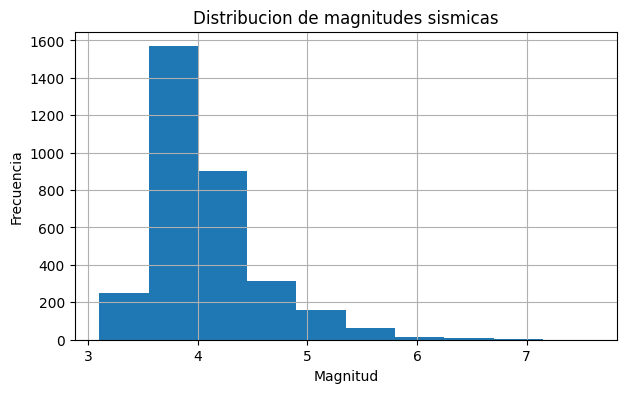

In [18]:
#Agregar graficos datos sismicos

import matplotlib.pyplot as plt
#Histograma de magnitudes

plt.figure(figsize=(7,4))
plt.hist(catalogo["magnitude_value_M"], bins =10)
plt.title("Distribucion de magnitudes sismicas")
plt.xlabel("Magnitud")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


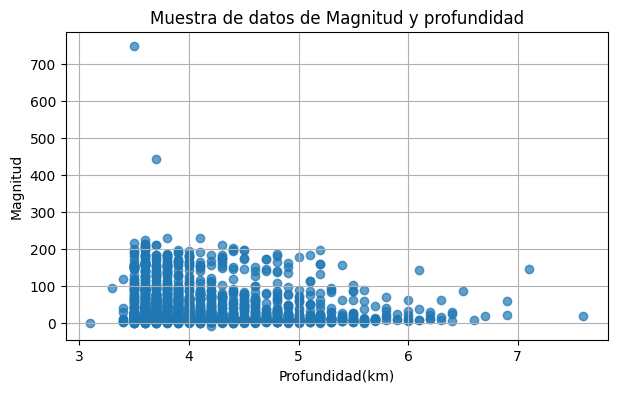

In [21]:
# Grafico comparativo profundidad y magnitud
plt.figure(figsize=(7,4))
plt.scatter(catalogo["magnitude_value_M"], catalogo["depth_value"], alpha= 0.7)
plt.title("Muestra de datos de Magnitud y profundidad")
plt.xlabel("Profundidad(km)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()